<a href="https://colab.research.google.com/github/Jcnok/Bootcamps_XPe/blob/main/Arquiteto_ML/Desafio2/Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕵️‍♂️ NLP - CLASSIFICAÇÃO DE FAKE NEWS USANDO DEEP LEARNING 📰



## Este projeto tem como objetivo construir um modelo de Machine Learning capaz de classificar notícias como **falsas** ou **verdadeiras** utilizando Deep Learning, especificamente a arquitetura **LSTM (Long Short-Term Memory)**.


## Por que usar o LSTM para classificação de texto?
Podemos classificar textos a partir do Processamento de Linguagem Natural e diferentes Algoritmos de Classificação baseados em Deep Learning como LSTMs e CNNs.

Existem muitos algoritmos de classificação clássicos como Árvores de Decisão, Random Forest, SVM, que podem fazer um bom trabalho, então por que usar LSTM para classificação?

> Uma boa razão para usar o LSTM é que ele é eficaz na memorização de informações importantes. Se olharmos e outras técnicas de classificação de redes não neurais, elas são treinadas em várias palavras como entradas separadas que são apenas palavras sem significado real como uma frase, e ao prever a classe dará a saída de acordo com as estatísticas e não de acordo com o significado. Isso significa que cada palavra é classificada em uma das categorias.

> Isso ocorre de maneira diferente em LSTM. No LSTM, podemos usar uma string de várias palavras para descobrir a classe à qual ela pertence. Isso é muito útil ao trabalhar com Processamento de Linguagem Natural. Se usarmos camadas apropriadas de incorporação e codificação em LSTM, o modelo será capaz de descobrir o significado real na string de entrada e fornecer a classe de saída mais precisa. O código a seguir elaborará a ideia de como a classificação de texto é feita usando LSTM.

Para a construção do modelo e testes, você pode baixar os dados em https://www.kaggle.com/c/fake-news/data#

# Importar bibliotecas


In [1]:
import pandas as pd

## Importar e verificar os dados

In [8]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/XPe/Arquiteto_ML/Mod02/Desafio2/train.csv")

'''
# Upload from google drive
from google.colab import files
uploaded = files.upload()
print("len(uploaded.keys():", len(uploaded.keys()))

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'\n# Upload from google drive\nfrom google.colab import files\nuploaded = files.upload()\nprint("len(uploaded.keys():", len(uploaded.keys())) \n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(name=fn, length=len(uploaded[fn]))) \n'

In [9]:
'''QUESTÃO 1'''
# Print the first 5 elements from dataframe
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Removendo valores ausentes e separando as features independentes (X) e dependentes (y):

In [60]:
df = df.dropna() # Removendo linhas com valores ausentes.
X = df.drop('label', axis=1) # Features independentes (texto da notícia).
y = df['label'] # Feature dependente (rótulo da notícia: falsa ou verdadeira).

In [11]:
X.shape

(18285, 4)

In [12]:
y.shape

(18285,)

In [13]:
import tensorflow as tf

In [14]:
tf.__version__

'2.18.0'

In [15]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [16]:
'''QUESTÃO 3'''
### Vocabulary size
voc_size= 5000

## One-hot representation

In [17]:
messages=X.copy()

In [18]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [19]:
messages.reset_index(inplace=True)

## Dataset Pre processing

In [21]:
import nltk
import re
'''QUESTÃO 4'''
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    '''QUESTÃO 5'''
    review = re.sub('### INSIRA A REGEX AQUI ###', ' ', messages['title'][i])
    '''QUESTÃO 6 '''
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    ### INSIRA O CODIGO PARA DIVIDIR UMA STRING EM UMA LISTA ###

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

A saída de streaming foi truncada nas últimas 5000 linhas.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441

In [23]:
# print corpus content
'''QUESTÃO 7'''
print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart', 'truth might get fire', 'civilian kill singl us airstrik identifi', 'iranian woman jail fiction unpublish stori woman stone death adulteri', 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart', 'beno hamon win french socialist parti presidenti nomin new york time', 'back channel plan ukrain russia courtesi trump associ new york time', 'obama organ action partner soro link indivis disrupt trump agenda', 'bbc comedi sketch real housew isi caus outrag', 'russian research discov secret nazi militari base treasur hunter arctic photo', 'us offici see link trump russia', 'ye paid govern troll social media blog forum websit', 'major leagu soccer argentin find home success new york time', 'well fargo chief abruptli step new york time', 'anonym donor pay million releas everyon arrest dakota access pipelin', 'fbi close hillari', 'chuck todd

In [24]:
# one hot representation
onehot_repr=[one_hot(words,voc_size)for words in corpus]
'''QUESTÃO 8'''
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[4915, 838, 3228, 2295, 1488, 1893, 1580, 4110, 3413, 620],
 [4498, 4457, 4840, 3537, 2818, 2780, 80],
 [3712, 4793, 3190, 3928],
 [2672, 2161, 1462, 3342, 3105, 2758],
 [4740, 2818, 3960, 3221, 770, 626, 2818, 3858, 1853, 3117],
 [3842,
  2678,
  440,
  506,
  453,
  184,
  3267,
  4627,
  1602,
  2647,
  1062,
  304,
  1611,
  3791,
  80],
 [3476, 934, 2893, 4944, 3809, 609, 1056, 2766, 2369, 3791, 3758],
 [2284, 126, 3252, 3052, 2093, 620, 184, 4367, 2369, 3791, 3758],
 [4299, 3438, 3109, 567, 3179, 3953, 1820, 493, 184, 479],
 [4772, 1431, 1623, 3409, 1614, 2862, 4501, 2412],
 [2679, 3937, 1381, 4321, 3949, 1287, 4058, 205, 720, 833, 2751],
 [3342, 4843, 1488, 3953, 184, 2093],
 [659, 3028, 4711, 1807, 382, 1753, 3368, 4722, 1360],
 [673, 2566, 2223, 1262, 123, 4933, 1194, 2369, 3791, 3758],
 [3875, 26, 2335, 3712, 3137, 2369, 3791, 3758],
 [2698, 2699, 3761, 1575, 984, 3590, 22, 1368, 180, 2371],
 [3195, 3253, 4457],
 [4156, 2503, 1349, 4843, 184, 2870, 3428, 80],
 [4909, 3325, 4

## Embedding Representation

In [35]:
'''QUESTÃO 9'''
sent_length= 20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4110 3413  620]
 [   0    0    0 ... 2818 2780   80]
 [   0    0    0 ... 4793 3190 3928]
 ...
 [   0    0    0 ... 2369 3791 3758]
 [   0    0    0 ... 1727 3169 3513]
 [   0    0    0 ... 3313 1566 1255]]


In [36]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4915,
        838, 3228, 2295, 1488, 1893, 1580, 4110, 3413,  620], dtype=int32)

## Creating model

In [37]:
'''
FAÇA AS ALTERAÇÕES/TESTES CONFORME FOLHA DE PERGUNTAS
DO DESAFIO PARA RESOLUÇÃO DAS QUESTÕES DE 10 A 15
'''
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
# Construa o modelo explicitamente
model.build(input_shape=(None, sent_length))  # Substitua 'sent_length' pelo comprimento real da sua sequência

# ou chame summary() para construir implicitamente
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


## Adicionando o Dropout

In [41]:
# Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
''' QUESTÃO 12 '''
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
''' QUESTÃO 13 '''
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.build(input_shape=(None, sent_length))
print(model1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 200)                 │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313,001 (1.19 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
len(embedded_docs), y.shape

(18285, (18285,))

In [43]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [44]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [46]:
from sklearn.model_selection import train_test_split
'''QUESTÃO 14'''
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(12250, 20) (12250,)
(6035, 20) (6035,)


In [ ]:
### EXECUTE ESTE CÓDIGO CASO QUEIRA MODIFICAR O TAMANHO DO CONJUNTO DE TREINO E TESTE ###
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
'''

In [47]:
# Finally Training
''' QUESTÃO 15 AQUI '''
train_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
#train_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)
#train_model=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7848 - loss: 0.4277 - val_accuracy: 0.9120 - val_loss: 0.2062
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9416 - loss: 0.1492 - val_accuracy: 0.9175 - val_loss: 0.2057
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9608 - loss: 0.1020 - val_accuracy: 0.9125 - val_loss: 0.2156
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9776 - loss: 0.0669 - val_accuracy: 0.9132 - val_loss: 0.2543
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9870 - loss: 0.0442 - val_accuracy: 0.9097 - val_loss: 0.3293
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9913 - loss: 0.0310 - val_accuracy: 0.8999 - val_loss: 0.3436
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9948 - loss: 0.0209 - val_accuracy: 0.9137 - val_loss: 0.3635
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9975 - loss: 0.0110 - val

## Predição e avaliação do modelo


In [48]:
#y_pred1=model.predict_classes(X_test)
y_pred1=np.argmax(model.predict(X_test), axis=-1)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,y_pred1)

array([[3419,    0],
       [2616,    0]])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.5665285832642917

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3419
           1       0.00      0.00      0.00      2616

    accuracy                           0.57      6035
   macro avg       0.28      0.50      0.36      6035
weighted avg       0.32      0.57      0.41      6035



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


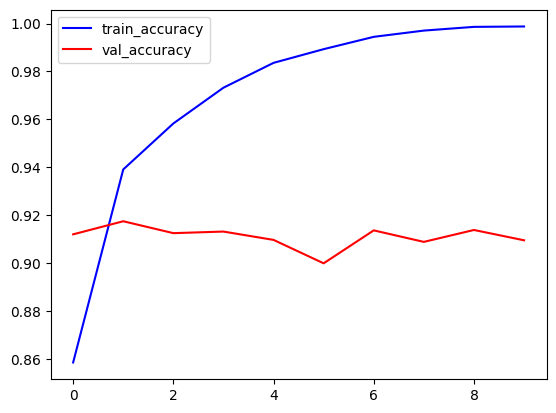

In [53]:
import matplotlib.pyplot as plt

plt.plot(train_model.history['accuracy'],'b',label='train_accuracy')
plt.plot(train_model.history['val_accuracy'],'r',label='val_accuracy')
plt.legend()

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

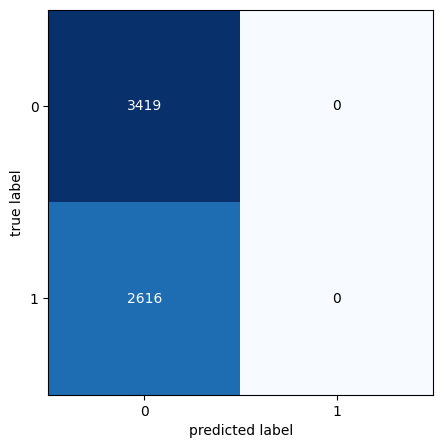

In [54]:
# pred_val=np.argmax(model.predict(x_val), axis=-1)
y_pred1=np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm= confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(cm, figsize=(5,5))